The big picture of training loop:
- initialize the parameters $\theta$ of your network
- loop until convergence
    - sample batch of input/output pairs
    - compute forward propagation h(x; $\theta$) of the input with your model
    - compute the loss function L(h(x; $\theta$))
    - update the parameters in $\theta$ using the optimizer

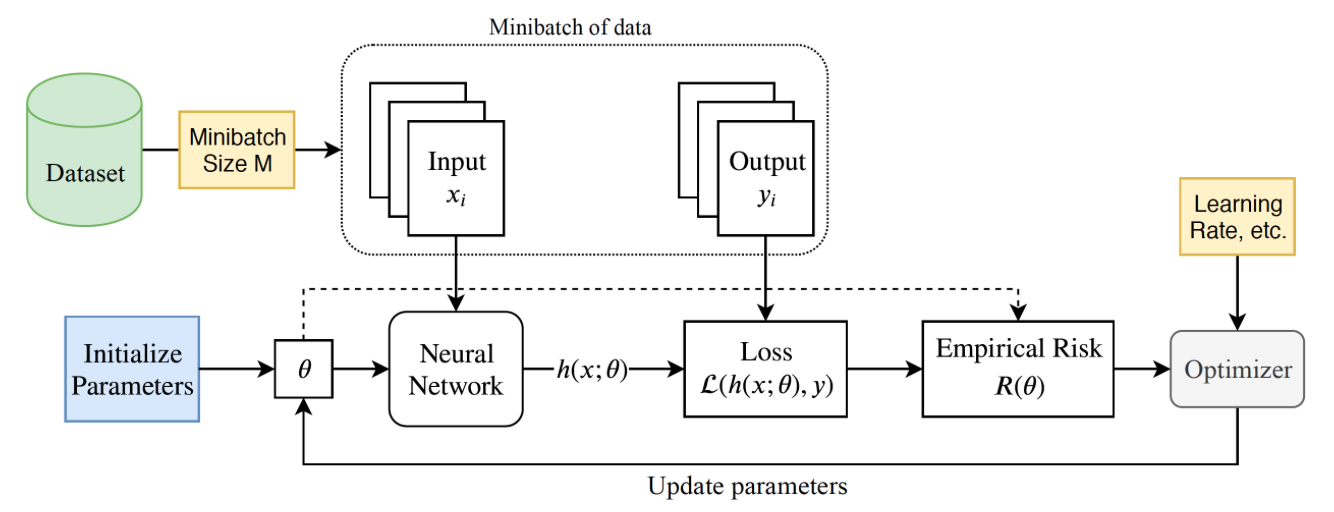

Typical training loop code in pytorch

In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision

In [2]:
class MLP(nn.Module):
    def __init__(self, input_dim=784, num_hidden=300, output_dim=10, activation_func=torch.relu):

        # super() is used to caall a method from parent or superclass in a class. It casll the __init__() method of the parent class of MLP which is nn.Module from pytorch in this case. This ennsuress that any inintialization defined in the parent class is properly executed which is crucial for setting up the internal s tructure oof the pytorch module  like registering layers or other necessary components for the model to work correctly.
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(input_dim, num_hidden)
        self.fc2 = nn.Linear(num_hidden, num_hidden)
        self.fc3 = nn.Lineaar(num_hidden, num_hidden)
        self.fc4 = nn.Linear(num_hidden, output_dim)
        self.activation_func = activation_func

        def forward(self,x):
            h1 = self.activation_func(self.fc1(x))
            h2 = self.activation_func(self.fc2(h1))
            h3 = self.activation_func(self.fc3(h2))
            out  = self.fc4(h3)

            return out, [h1,h2,h3]

In [11]:
#  Load MNIST data for experiment
mnist_train = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())

mnist_test = datasets.MNIST("../data", train=False, download=True, transform=transforms.ToTensor())


In [15]:
mnist_train = datasets.MNIST('data', train=True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,),(0.3081,)),]))

mnist_test = datasets.MNIST('data', train=False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,),(0.3081,)),]))

bs = 128
train_dl = DataLoader(mnist_train, batch_size=bs)
test_dl = DataLoader(mnist_test,batch_size=100)

dataiter = iter(train_dl)
images, labels = dataiter.next()
viz = torchvision.utils.make_grid(images, nrow=10,  padding=0.2).numpy()
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(np.transpose(viz, (1,2,0)))
ax.grid(None)

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'